Task 1 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
def rosenbrock(x):
    return 100* (x[1] - x[0]**2)**2 + (1 - x[0])**2

In [4]:
def rosenbrock_grad(x):
    dx = -400 * x[0] * (x[1] - x[0]**2) - 2 *(1-x[0])
    dy = 200 * (x[1] - x[0]**2)
    return np.array([dx, dy])


In [5]:
def rosenbrock_hessian(x):
    dxx = 1200 * x[0]**2 - 400 * x[1] + 2 
    dxy = -400 *x[0]
    dyy = 200
    return np.array([[dxx, dxy],
                     [dxy, dyy]])

In [ ]:
def newton(f, grad_f, hess_f, x0, ebsilon = 1e-6, max_iter = 10000):
    x = x0.copy()
    xs = [x.copy()]
    fs = [f(x)]
    for _ in range(max_iter):
        grad = grad_f(x)
        hess = hess_f(x)
        try: 
            d = np.linalg.solve(hess, -grad)
        except np.linalg.LinAlgError:
            print("Hessian is singular.")
            break
        x = x + d 
        xs.append(x.copy())
        fs.append(f(x))
        if abs(fs[-1] - fs[-2]) < ebsilon:
            break
    return np.array(xs), np.array(fs)

In [7]:
x0_1 = np.array([2.0, 4.0])
x0_2 = np.array([-2.0, 10.0])

xs1, fs1 = newton(rosenbrock, rosenbrock_grad, rosenbrock_hessian, x0_1)
xs2, fs2 = newton(rosenbrock, rosenbrock_grad, rosenbrock_hessian, x0_2)

print(f"Start at [2,4] — Iterations: {len(fs1)-1}")
print(f"Start at [-2,10] — Iterations: {len(fs2)-1}")

Start at [2,4] — Iterations: 3
Start at [-2,10] — Iterations: 5


In [8]:
fs1

array([1.00000000e+00, 1.00000000e+02, 4.43734259e-29, 0.00000000e+00])

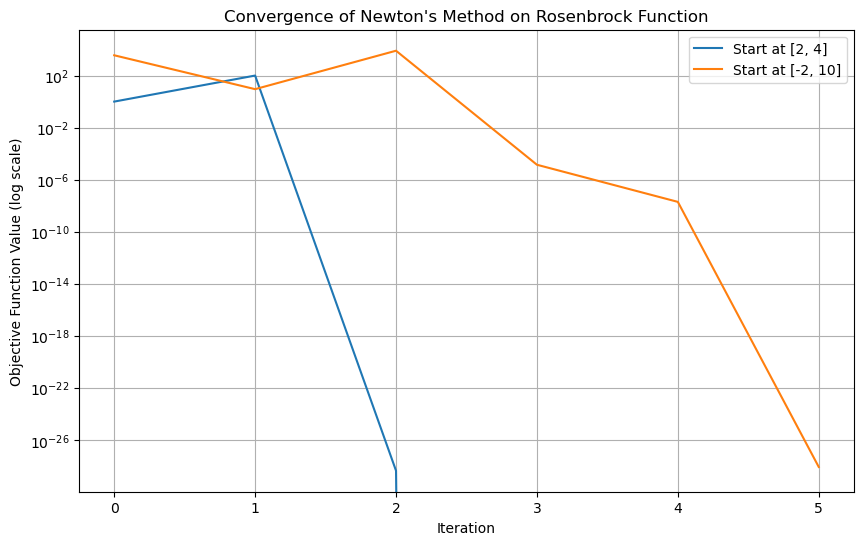

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(fs1, label='Start at [2, 4]')
plt.plot(fs2, label='Start at [-2, 10]')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (log scale)')
plt.title("Convergence of Newton's Method on Rosenbrock Function")
plt.legend()
plt.grid(True)
plt.show()

Task 2 

In [28]:
def quasi_newton(f, grad_f, x0, ebsilon = 1e-6, max_iter = 10000):
    x = x0.copy()
    H = np.eye(len(x0))
    xs = [x.copy()]
    fs = [f(x)]
    Hs = [H.copy()]
    ds = []

    for _ in range(max_iter):
        grad = grad_f(x)
        d = -H @ grad
        ds.append(d.copy())

        x_new = x + d*0.1
        grad_new = grad_f(x_new)
        s = x_new - x 
        y = grad_new - grad
        u = s - H @ y 

        denom = u @ y 
        if abs(denom) !=0: 
            H = H + np.outer(u, u) / denom

        x = x_new 
        xs.append(x.copy())
        fs.append(f(x))
        Hs.append(H.copy())

        if abs(fs[-1] - fs[-2]) < ebsilon: 
            break 

    return np.array(xs), np.array(ds), np.array(Hs), np.array(fs)

In [29]:
x0_1 = np.array([2.0, 4.0])
x0_2 = np.array([-2.0, 10.0])

xs1, ds1, Hs1, fs1 = quasi_newton(rosenbrock, rosenbrock_grad, x0_1)
xs2, ds2, Hs2, fs2 = quasi_newton(rosenbrock, rosenbrock_grad, x0_2)

print(f"Start at [2, 4] — Iterations: {len(fs1)-1}")
print(f"Start at [-2, 10] — Iterations: {len(fs2)-1}")

Start at [2, 4] — Iterations: 137
Start at [-2, 10] — Iterations: 4129


In [33]:
fs2

array([3.60900000e+03, 5.37571885e+12, 3.53430578e+12, ...,
       7.17171932e+04, 7.17171931e+04, 7.17171931e+04])

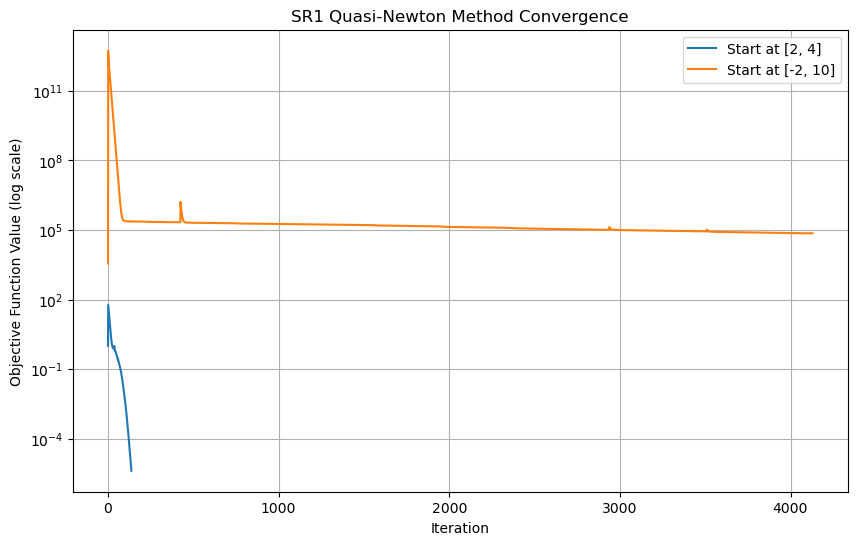

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(fs1, label='Start at [2, 4]')
plt.plot(fs2, label='Start at [-2, 10]')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (log scale)')
plt.title("SR1 Quasi-Newton Method Convergence")
plt.legend()
plt.grid(True)
plt.show()

1. Чи залежить кількість ітерацій у обох методів від початкової точки?
Так, у загальному випадку залежить. Далека або погана стартова точка може сповільнити збіжність або призвести до розбіжності.


2. Скільки ітерацій потрібно методу Ньютона для квадратичної позитивно означеної функції з точною другою похідною?
Одна ітерація. Метод Ньютона точно знаходить мінімум квадратичної форми при будь-якому старті.


3. Чому SR1 не сходиться до справжньої матриці Гессе?
Бо оновлення SR1 базується лише на окремих напрямках зміни градієнта. Воно не гарантує точного відновлення повної матриці.


4. Чи завжди апроксимація SR1 є позитивно означеною?
Ні. SR1 може дати матрицю, що не є позитивно означеною, на відміну від BFGS.


5. Порівняй кількість ітерацій у методів.
Метод Ньютона зазвичай потребує менше ітерацій, бо має квадратичну збіжність. SR1 – повільніший, бо поступово наближається до правильної кривизни.